In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#Graphics ---> SVG 
%config inlineBackend.figure_format = "svg"
#Disable Warnings
import warnings
warnings.filterwarnings('ignore')
# Increase the default plot size and set the color schemes
plt.rcParams['figure.figsize']= 8,5
plt.rcParams['image.cmap']= 'viridis'
import pandas as pd


In [2]:
# Load the dataset
df = pd.read_csv('vgsales.csv')
df.shape

(16598, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
#change some columns field as numerical features
df.Year = df.Year.fillna(df.Year.median())
df.head()
df['Year']= df['Year'].astype('int64')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
df.shape

(16540, 11)

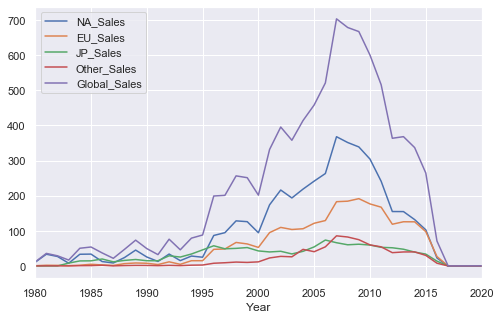

In [8]:
df[[x for x in df.columns if 'Sales' in x]+['Year']].groupby('Year').sum().plot()

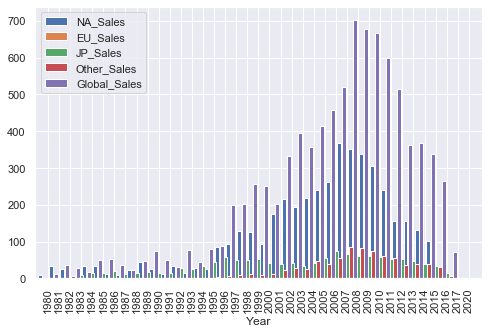

In [9]:
df[[x for x in df.columns if 'Sales' in x]+['Year']].groupby('Year').sum().plot(kind='bar',width = 1.8)

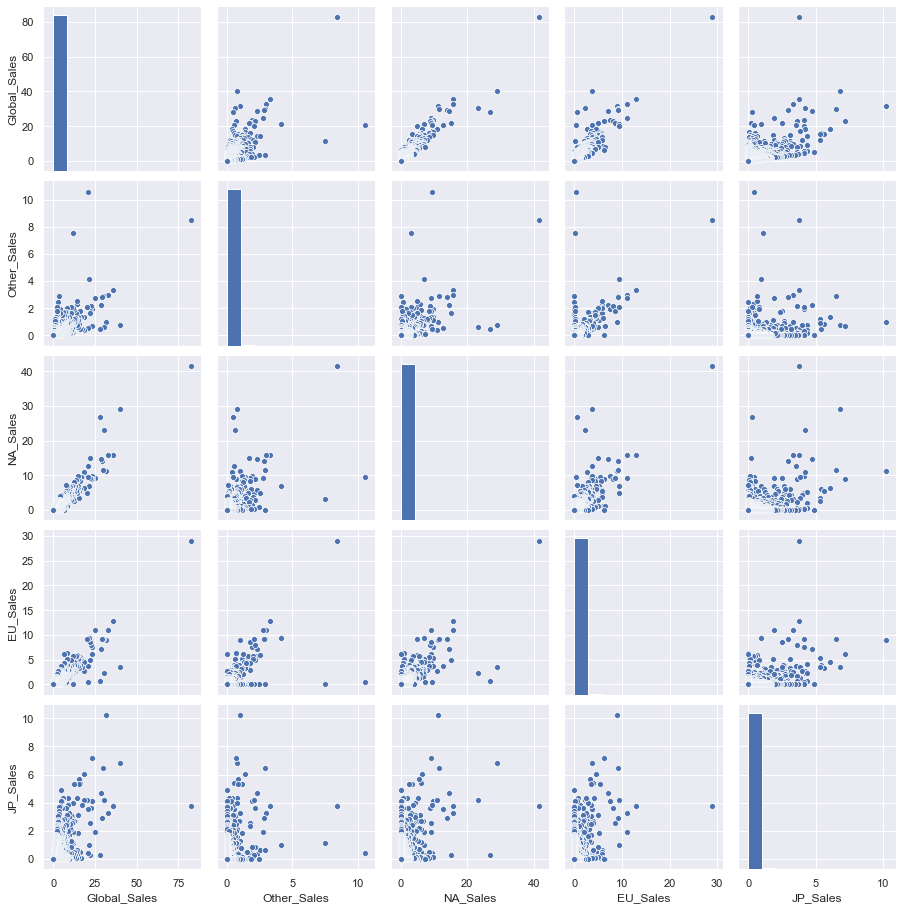

In [10]:
# Pair plot 
%config inlineBackend.figure_format = "png"
sns.pairplot(df[['Global_Sales','Other_Sales','NA_Sales','EU_Sales','JP_Sales']]);

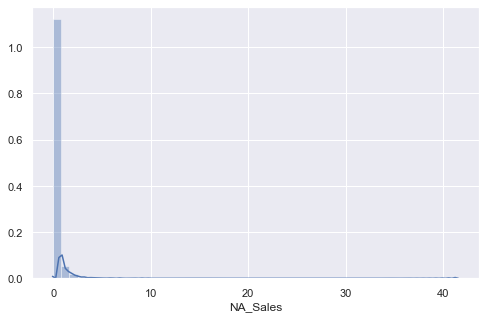

In [11]:
#Distplot --> Bar graph --> line graph
%config inlineBackend.figure_format = "svg"
sns.distplot(df['NA_Sales']);

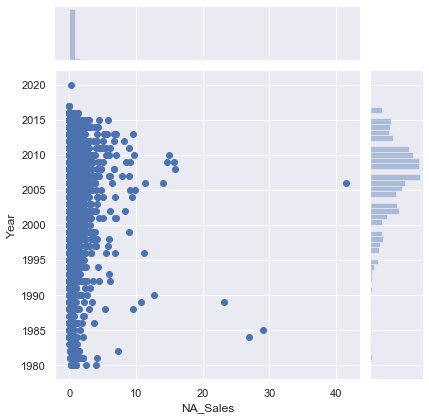

In [12]:
sns.jointplot(x='NA_Sales',y='Year', data = df, kind = 'scatter');

In [14]:
# Plotly
import plotly
import plotly.graph_objs as go

In [19]:
years_df = df.groupby('Year')[['Global_Sales']].sum().join(df.groupby('Year')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_games']

In [20]:
years_df.columns

Index(['Global_Sales', 'Number_of_games'], dtype='object')

In [21]:
print(years_df)

      Global_Sales  Number_of_games
Year                               
1980         11.38                9
1981         35.77               46
1982         28.86               36
1983         16.79               17
1984         50.36               14
1985         53.94               14
1986         37.07               21
1987         21.74               16
1988         47.22               15
1989         73.45               17
1990         49.39               16
1991         32.23               41
1992         76.16               43
1993         45.98               60
1994         79.17              121
1995         88.11              219
1996        199.15              263
1997        200.98              289
1998        256.47              379
1999        251.27              338
2000        201.56              349
2001        331.47              482
2002        395.52              829
2003        357.85              775
2004        414.01              744
2005        458.51          

In [27]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
trace0 = go.Scatter(x=years_df.index,y=years_df['Global_Sales'], name='Global Sales')
trace1 = go.Scatter(x=years_df.index,y=years_df['Number_of_games'], name='Number of games')

data=[trace0,trace1]

#title of graph
layout = {'title':'Plot using plotly'}

fig = go.Figure(data = data, layout=layout)
iplot(fig, show_link=False)

In [28]:
plotly.offline.plot(fig, filename='sample1.html', show_link=False)

'sample1.html'